In [1]:
import numpy as np
import sklearn  as sk
from sklearn import datasets
import matplotlib.pyplot as plt


Задание №1


Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.


In [2]:
data, target, coef = datasets.make_regression(n_samples=100000, n_features = 1, n_informative = 1, 
                                                 n_targets = 1, noise = 10, coef = True, random_state = 3)

In [3]:
coef

array(85.59724823)

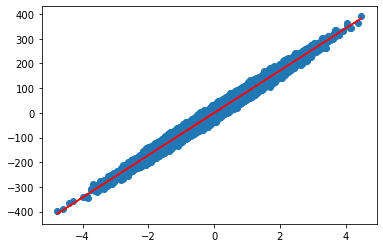

In [4]:
plt.scatter(data,target)
plt.plot(data,coef*data,color = 'red')
plt.show()

Добавим свободный столбец из едениц для коэфициента интерцепта

In [5]:
a=np.ones(len(data))
data = np.hstack((np.column_stack(a).reshape(-1,1),data))

In [6]:
data

array([[ 1.        , -1.22022   ],
       [ 1.        ,  0.32669378],
       [ 1.        , -2.37452056],
       ...,
       [ 1.        ,  0.65977606],
       [ 1.        ,  0.54330925],
       [ 1.        ,  0.48459046]])

In [7]:
data.shape

(100000, 2)

In [8]:
# Функция ошибки
def mse(y_pred,y):
    return ((y_pred - y)**2).mean()

In [9]:
# Коэф детерминации
def R2(y_pred,y):
    return 1- ((y_pred - y)**2).sum()/((y-y.mean())**2).sum()

In [10]:
# Функция вывода результатов тестирования
def print_result(y_pred,y,W_classic,iter_classic):
    print('Результаты обучения  градиентного спуска')
    print(f'полученный результат W \n {W_classic}')
    print(f'последняя ошибка -  {iter_classic[-1]},минимальная ошибка {min(iter_classic)}')
    print(f'Количество итераций  - {len(iter_classic)}')
    print(f'коэф. R2  - {R2(y_pred,y)}')

In [11]:
# Функция градиентнго спуска
def gradient_descent(X,Y,alpha=0.01,count_iter_max = int(1e4),criteriy =1e-8 ):
    number_obj,number_features = X.shape
    Wr = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wr
        data.append(mse(Y_pred,Y))
        delta = Y_pred-Y
        Wr_old = Wr.copy()
        Wr-=alpha*2/number_obj*(X.T@delta)
        if (((Wr-Wr_old).T@(Wr-Wr_old)))**(1/2)<criteriy:
            print_result(Y_pred,Y,Wr,data)
            return Wr,data  
    print_result(Y_pred,Y,Wr,data)    
    return Wr,data  

Проведем расчет по нашим данным градиентного спуска

In [12]:
W_classic, iter_classic = gradient_descent(data,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.59112256e-02]
 [ 8.55752399e+01]]
последняя ошибка -  99.31363482481758,минимальная ошибка 99.31363482481758
Количество итераций  - 946
коэф. R2  - 0.9865324075761069


Попоробуем обучить модель на 70% выборки, и проверить качество результтов предсказания 30%

In [13]:
# Функция деления выборки , обучения и сравнения результатов для обычного градиентного спуска
def check_training(data):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = gradient_descent(X_train,y_train.reshape(-1,1))
    y_pred = X_test@W
    print(30*'-')
    print('Результаты тестовой выборки')
    print(f'Ошибка - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'Коэф  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

In [14]:
# Функция деления выборки , обучения и сравнения результатов для обычного градиентного спуска L2
def check_training_l2(data,k):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = gradient_descent_l2(X_train,y_train.reshape(-1,1),k=k)
    y_pred = X_test@W
    print(30*'-')
    print('Результаты тестовой выборки')
    print(f'Ошибка - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'Коэф  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

In [15]:
# Функция деления выборки , обучения и сравнения результатов для обычного градиентного спуска L1
def check_training_l1(data,k):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = gradient_descent_l1(X_train,y_train.reshape(-1,1),k=k)
    y_pred = X_test@W
    print(30*'-')
    print('Результаты тестовой выборки')
    print(f'Ошибка - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'Коэф  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

In [16]:
# Функция деления выборки , обучения и сравнения результатов для стохастического градиентного спуска
def check_training_st(data):
    a = np.arange(len(data))
    ind_train= np.random.choice(a,size= int(len(data)*0.7),replace=False)
    X_train =  data[ind_train]
    y_train =target[ind_train]
    X_test = np.delete(data,ind_train,axis=0)
    y_test = np.delete(target,ind_train,axis=0)
    W, it = s_gradient_descent(X_train,y_train.reshape(-1,1))
    y_pred = X_test@W
    print(30*'-')
    print('Результаты тестовой выборки')
    print(f'Ошибка - {mse(y_pred,y_test.reshape(-1,1))}')
    print(f'Коэф  - {R2(y_pred,y_test.reshape(-1,1))}')
    plt.scatter( X_test[:,1] ,    y_pred,color = 'red')
    plt.scatter( X_test[:,1] ,    y_test)

Запсустим тестирование разделением и обучением на обычных данных по обычному гр. спуску

Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.91022880e-02]
 [ 8.55501033e+01]]
последняя ошибка -  99.5006192576357,минимальная ошибка 99.5006192576357
Количество итераций  - 945
коэф. R2  - 0.9864999844749841
------------------------------
Результаты тестовой выборки
Ошибка - 98.87946292179394
Коэф  - 0.9866076009356546


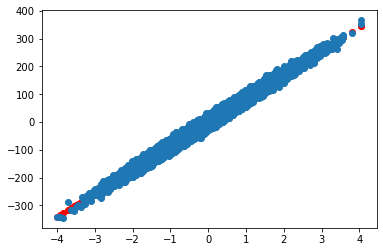

In [17]:
check_training(data)

стохастический градиентный спуск

In [18]:
# Функция стохастического гр. спуска
def s_gradient_descent(X,Y,alpha=0.01,count_iter_max = 10000,criteriy =1e-5):
    number_obj,number_features = X.shape
    Wr = np.zeros((number_features,1))
    data=[]
    for  i in range(count_iter_max):
        item = np.random.randint(number_obj)
        Y_pred = X[item]@Wr
        data.append(mse(X@Wr,Y))
        delta = Y_pred-Y[item]
        Wr_old = Wr.copy()
        Wr-=alpha*2*delta*X[item].reshape(-1,1)
        if np.linalg.norm(Wr-Wr_old,ord = 2)<criteriy:
            print_result(X@Wr,Y,Wr,data)
            return Wr,data
    print_result(X@Wr,Y,Wr,data)    
    return Wr,data  

In [19]:
W_s, iter_s = s_gradient_descent(data,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[ 0.96329377]
 [84.30254484]]
последняя ошибка -  101.88731360091633,минимальная ошибка 99.31471041121507
Количество итераций  - 931
коэф. R2  - 0.986183397605012


Попоробуем обучить модель на 70% выборки, и проверить качество результтов предсказания 30%, для стохастического спуска

Результаты обучения  градиентного спуска
полученный результат W 
 [[-0.57585282]
 [83.83518316]]
последняя ошибка -  102.68789097038074,минимальная ошибка 99.32260245558706
Количество итераций  - 1104
коэф. R2  - 0.9861322015408627
------------------------------
Результаты тестовой выборки
Ошибка - 102.4968567982794
Коэф  - 0.9859651397451437


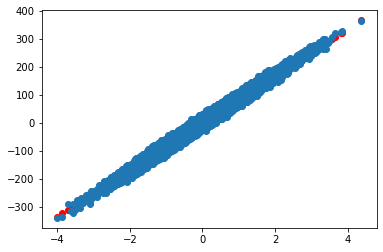

In [20]:
check_training_st(data)

Нарисуем графики ошибок при обучении

In [21]:
x1 = [i for i in range(1,len(iter_classic)+1) ]
x2 = [i for i in range(1,len(iter_s)+1) ]

<function matplotlib.pyplot.show(*args, **kw)>

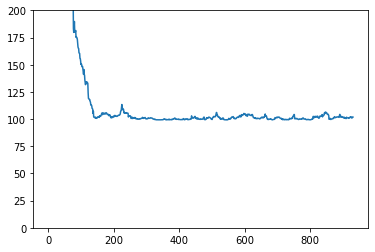

In [22]:
# "Ошибка в стохастическом спуске"
plt.ylim(0, 200)
plt.plot(x2,iter_s)
plt.show

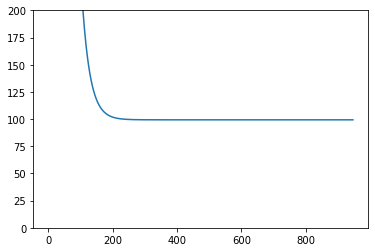

In [23]:
# Ошибка при обычном спуске
plt.ylim(0, 200)
plt.plot(x1,iter_classic)

На одном графике масштабы не позволяют нарисовать. Что бы достич установленный уровень сходимости.
Стахостический метод требует куда больше опереаций и времени. Дает менее точные результаты

Попробуем нормализовать признаки и проделать то же самое

In [24]:
def norm(a):
    return (a-a.min())/(a.max()-a.min())

In [25]:
data1= data.copy()

In [26]:
for i in range(1, data1.shape[1]):
    data1[:,i] = norm(data1[:,i])


In [27]:
data1.max(axis=0),data1.min(axis = 0)

(array([1., 1.]), array([1., 0.]))

Классический спуск

In [28]:
W_classic, iter_classic = gradient_descent(data1,target.reshape(-1,1),alpha=0.01,count_iter_max = int(1e5),criteriy =1e-6 )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-409.35138  ]
 [ 792.3688588]]
последняя ошибка -  99.31363509856033,минимальная ошибка 99.31363509856033
Количество итераций  - 65726
коэф. R2  - 0.9865324075389856


класический спуск с обучением и тестом

Результаты обучения  градиентного спуска
полученный результат W 
 [[-342.88569697]
 [ 664.93585144]]
последняя ошибка -  287.91197759973466,минимальная ошибка 287.91197759973466
Количество итераций  - 10000
коэф. R2  - 0.9609451983248599
------------------------------
Результаты тестовой выборки
Ошибка - 288.1467412180382
Коэф  - 0.9609499094884901


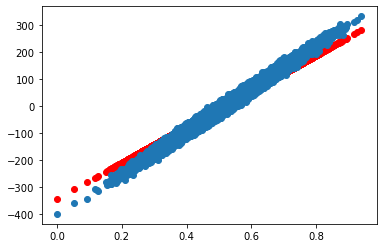

In [29]:
check_training(data1)

Стохастический спуск по нормализованным данным

In [30]:
W_s, iter_s = s_gradient_descent(data1,target.reshape(-1,1) ,alpha=0.01,count_iter_max = 100000,criteriy =1e-5)

Результаты обучения  градиентного спуска
полученный результат W 
 [[-410.7325388 ]
 [ 792.29724691]]
последняя ошибка -  101.3247151405091,минимальная ошибка 99.313642518568
Количество итераций  - 43015
коэф. R2  - 0.9862596875581374


Стохастический спуск по нормализованным данным с обучением и тестом

Результаты обучения  градиентного спуска
полученный результат W 
 [[-345.12602386]
 [ 660.48175694]]
последняя ошибка -  309.4543863727977,минимальная ошибка 300.66195043537556
Количество итераций  - 10000
коэф. R2  - 0.9572375091664891
------------------------------
Результаты тестовой выборки
Ошибка - 314.7656781963347
Коэф  - 0.9569841988265296


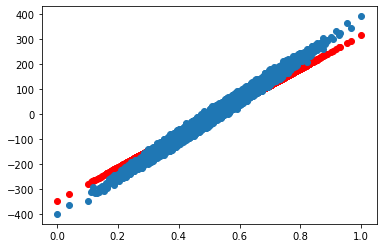

In [31]:
check_training_st(data1)

Попробуем стандартизацию
Все о же самое для стандартизированных данных

In [32]:
def stand(a):
    return (a-a.mean())/a.std()

In [33]:
data2= data.copy()

In [34]:
for i in range(1, data2.shape[1]):
    data2[:,i] = stand(data2[:,i])


In [35]:
W_classic, iter_classic = gradient_descent(data2,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-0.21305565]
 [85.2933421 ]]
последняя ошибка -  99.31363482481758,минимальная ошибка 99.31363482481758
Количество итераций  - 940
коэф. R2  - 0.9865324075761069


Результаты обучения  градиентного спуска
полученный результат W 
 [[-0.21750879]
 [85.29591562]]
последняя ошибка -  99.64071554827125,минимальная ошибка 99.64071554827125
Количество итераций  - 939
коэф. R2  - 0.9865068909708717
------------------------------
Результаты тестовой выборки
Ошибка - 98.55053463985917
Коэф  - 0.9865921889810242


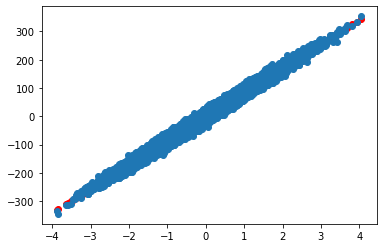

In [36]:
check_training(data2)

In [37]:
W_s, iter_s = s_gradient_descent(data2,target.reshape(-1,1) )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.24034256]
 [85.686405  ]]
последняя ошибка -  100.52344124807738,минимальная ошибка 99.31420752189038
Количество итераций  - 1569
коэф. R2  - 0.986368348382881


Результаты обучения  градиентного спуска
полученный результат W 
 [[-0.17084601]
 [82.70347638]]
последняя ошибка -  105.52573040082697,минимальная ошибка 98.62862374276447
Количество итераций  - 9489
коэф. R2  - 0.9857547263017837
------------------------------
Результаты тестовой выборки
Ошибка - 107.18266561790587
Коэф  - 0.9853095743900966


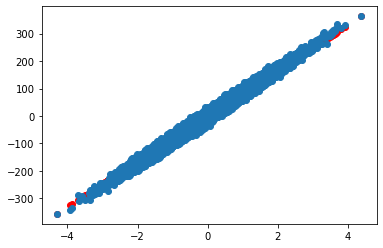

In [38]:
check_training_st(data2)

Стандартизаци дала хорошие результаты

Задание № 2

Модифицировать решение первого задания путем добавления  𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

Для расчета градиента, К производной целевой функции нужно добавить дополнительное слагаемое, производную от w1^2+w2^2+....Wn^2
тогда градинет по w1 = 2*w1 + w2^2+....Wn^2, градиент по w2 = w1^2+2*w2+....Wn^2 ....
Что бы это получить, нужно сдлеать матрицу из строк W, по главной диагонали которой будут двойки


In [39]:
def mse_l2(y_pred,y,W,k=0.001):
    return ((y_pred - y)**2).mean()+k*(W*W).sum()

In [40]:
# Функция градиентнго спуска  c 𝐿2 -регуляризации
def gradient_descent_l2(X,Y,alpha=0.01,count_iter_max = int(1e5),criteriy =1e-8,k=0.001):
    number_obj,number_features = X.shape
    Wr = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wr
        data.append(mse_l2(Y_pred,Y,Wr,k=k))
        delta = Y_pred-Y
        Wr_old = Wr.copy()
        Wr-=alpha*2/number_obj*(X.T@delta)+2*k*Wr
        if (((Wr-Wr_old).T@(Wr-Wr_old)))**(1/2)<criteriy:
            print_result(Y_pred,Y,Wr,data)
            return Wr,data  
    print_result(Y_pred,Y,Wr,data)    
    return Wr,data  

In [41]:
W_classic, iter_classic = gradient_descent_l2(data,target.reshape(-1,1),k=0.001 )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-3.08556823e-02]
 [ 7.77488814e+01]]
последняя ошибка -  166.2075478360374,минимальная ошибка 166.2075478360374
Количество итераций  - 859
коэф. R2  - 0.9782808734394647


Посмотрим на обучение

Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.81178725e-02]
 [ 7.77493327e+01]]
последняя ошибка -  166.5732569802727,минимальная ошибка 166.5732569802727
Количество итераций  - 861
коэф. R2  - 0.9781786898027921
------------------------------
Результаты тестовой выборки
Ошибка - 159.28690951875598
Коэф  - 0.978519109502058


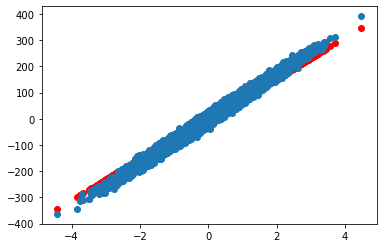

In [42]:
check_training_l2(data,k=0.001)

L1

In [43]:
def mse_l1(y_pred,y,W,k=0.001):
    return ((y_pred - y)**2).mean()+k*np.abs(W).sum()

In [44]:
# Функция градиентнго спуска  c 𝐿1 -регуляризации
def gradient_descent_l1(X,Y,alpha=0.01,count_iter_max = int(1e4),criteriy =1e-8,k=0.001):
    number_obj,number_features = X.shape
    Wr = np.random.randn(number_features).reshape(-1,1)
    data=[]
    for  i in range(count_iter_max):
        Y_pred = X@Wr
        data.append(mse_l1(Y_pred,Y,Wr,k=k))
        delta = Y_pred-Y
        Wr_old = Wr.copy()
        W_delta = np.array([])
        for j in Wr:
            if j>0:
                W_delta = np.append(W_delta, k)
            elif j<0:
                W_delta=np.append(W_delta, -k)
            else:
                W_delta = np.append(W_delta, 0)    
        W_delta = W_delta.reshape(-1,1) 
        Wr-=alpha*2/number_obj*(X.T@delta)+2*W_delta
        if (((Wr-Wr_old).T@(Wr-Wr_old)))**(1/2)<criteriy:
            print_result(Y_pred,Y,Wr,data)
            return Wr,data  
    print_result(Y_pred,Y,Wr,data)    
    return Wr,data  

In [45]:
W_classic, iter_classic = gradient_descent_l1(data,target.reshape(-1,1),k=0.001 )

Результаты обучения  градиентного спуска
полученный результат W 
 [[-2.05894013e-03]
 [ 8.54746149e+01]]
последняя ошибка -  99.40943795759506,минимальная ошибка 99.40936332407755
Количество итераций  - 10000
коэф. R2  - 0.9865310069965945


Результаты обучения  градиентного спуска
полученный результат W 
 [[-1.85286317e-03]
 [ 8.54832103e+01]]
последняя ошибка -  99.17182728832522,минимальная ошибка 99.1718069319093
Количество итераций  - 10000
коэф. R2  - 0.9865274265212697
------------------------------
Результаты тестовой выборки
Ошибка - 99.8727537300121
Коэф  - 0.9865393489211511


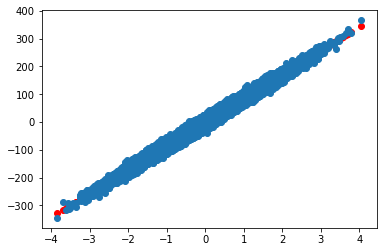

In [46]:
check_training_l1(data,k=0.001)